# Visualize https://jobinja.ir/ job posts in Programming field

In [2]:
import json
import collections
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

All Job information is collected from https://jobinja.ir/ Web scrapping is performed by running script robot.py

In [3]:
# to load the json file
BASE_PATH = Path.cwd()
with Path(f"{BASE_PATH}/data/mod_jobinja.json").open(mode="r") as f:
    data = json.load(f)

In [4]:
# to represent data arch sample
data["data"][0]

{'title': 'استخدام متخصص کنترل پروژه سيستم های نرم\u200cافزاری',
 'Type': 'Web, Programming and Software',
 'Provience/City': ['تهران', 'تهران'],
 'Colab Type': 'Full-time',
 'Min of year Exp': '3 to 7 years',
 'Salary': 'Negotiable',
 'Skills': ['کنترل پروژه',
  'MSProject',
  'Microsoft Office',
  'کنترل و برنامه ریزی پروژه'],
 'Gender': 'Any',
 'Military Service': 'مهم\u200c نیست',
 'Degree': 'کارشناسی'}

# Data Visualiztion

### Visualize the 25 most demanded technologies in Programming

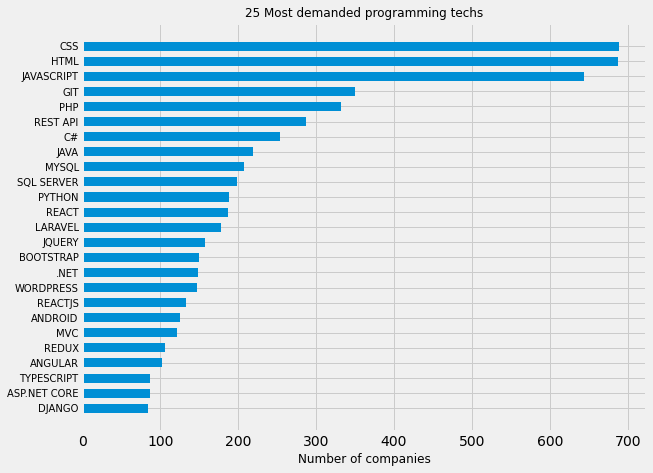

In [5]:
# counting each tech
counter = collections.Counter()
for row in data["data"]:
#     convert all values into uppercase to avoid counting repetition
    skills = list(map(str.upper, row.get("Skills")))
    counter.update(skills)

# remove redundant values from counter object
redun = ("BACK-END", "FRONT-END", "FULL-STACK", "کارآموزی", "OOP", "SQL")
counter = {key:value for key, value in counter.items() if key not in redun}
    

# seperate counter key, value pairs for visualization
# sort the key:pair values by their counting in descending order to extract 25 most demanded skills
techs = list()
count_per_each = list()
for index, row in enumerate(sorted(counter.items(), key=lambda x: x[1], reverse=True)):
    if index == 25:
        break
    techs.append(row[0])
    count_per_each.append(row[1])

# to visualize results in descending order
techs.reverse()
count_per_each.reverse()
    

    
plt.style.use("fivethirtyeight")
figure , ax = plt.subplots(figsize=(9,7))

# create a horizontal bar chart
ax.barh(techs, count_per_each, height=0.6)

ax.set_title("25 Most demanded programming techs", fontsize=12)
ax.set_xlabel("Number of companies", fontsize=12)

# set size of y tick labels
ax.tick_params(axis="y", which="major", labelsize=10)
plt.show()

### Visualize the monthly salary using histogram charts

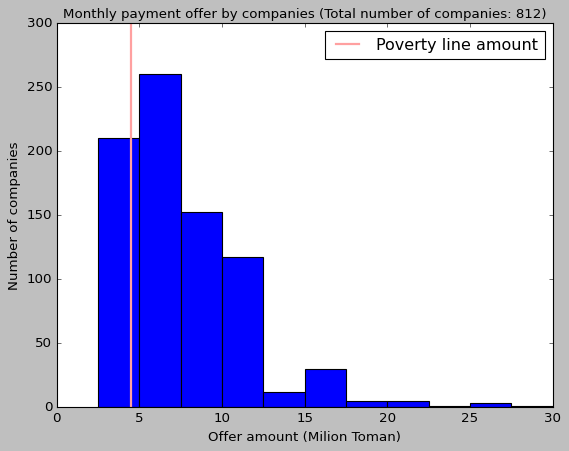

In [6]:
# store salaries in an array object
# divide salaries by 1 million for better visualization 
salaries = list()
million = 1000000

for row in data["data"]:
    monthly_salary = row.get("Salary")
    
#     ignore non-numerical data types
    if type(monthly_salary) != int:
        continue
    salaries.append(monthly_salary/million)

# set the bins
bins = [i * 2.5 for i in range(1, 13)]

# set the poverty line in Iran (the floatung point number is in Million Toman - year 2020) 
poverty_line = 4.5 

plt.style.use("classic")
figure, ax = plt.subplots(figsize=(8, 6))

# create the histogram object using salaries as data points
ax.hist(salaries, bins=bins, edgecolor="black")
# draw poverty line in histogram
ax.axvline(poverty_line, color = "#ffa0a0", label="Poverty line amount", linewidth=2)

# display the label in the output file
plt.legend()

number_of_companies = len(salaries)
ax.set_title(f"Monthly payment offer by companies (Total number of companies: {number_of_companies})", fontsize=12)
ax.set_xlabel("Offer amount (Milion Toman)")
ax.set_ylabel("Number of companies")

plt.show()

### Visualize collaboration type using pie charts  

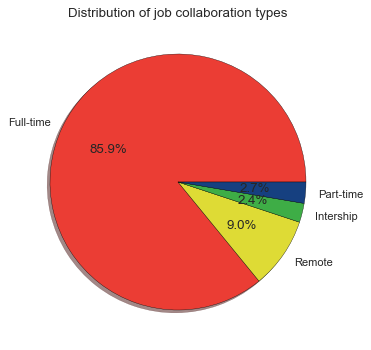

In [7]:
counter = collections.Counter()
for row in data["data"]:
    colab_type = row.get("Colab Type")
    
#     convert non-array objects into array
    if type(colab_type) != list:
        colab_type = [colab_type]
    counter.update(colab_type)

colab_type = list()
slices = list()

for key, value in counter.items():
    colab_type.append(key)
    slices.append(value)

# set the colors for each slice in pie chart
colors = ["#eb3d34", "#dedb35", "#3ead46", "#164080"]

plt.style.use("seaborn")
figure, ax = plt.subplots(figsize = (7, 5))

# create the pie obj using slices array
ax.pie(slices, labels=colab_type, colors=colors, wedgeprops={"edgecolor": "black"}, shadow=True, autopct="%1.1f%%")
ax.set_title("Distribution of job collaboration types")


plt.show()

### Visualize both cities, proviences with the most job posts using horizontal bar charts

In [8]:
counter_cities = collections.Counter()
counter_provs = collections.Counter()

# keep track of all job posts number
total_number_of_job_posts = 0

for row in data["data"]:
    counter_cities.update([row.get("Provience/City")[1]])
    counter_provs.update([row.get("Provience/City")[0]])
    
    total_number_of_job_posts += 1

cities = list()
amount1 = list()

# display cities which has less than 4 job posts as others ("سایر")
others = 0
for key, value in sorted(counter_cities.items(), key=lambda x: x[1], reverse=True):
    if value < 4:
        others += value
        continue
    cities.append(key)
    amount1.append(value)
else:
    cities.append("سایر")
    amount1.append(others)


proviences = list()
amount2 = list()
# display proviences which has less than 4 job posts as others ("سایر")
others = 0
for key, value in sorted(counter_provs.items(), key=lambda x: x[1], reverse=True):
    if value < 4:
        others += value
        continue
    proviences.append(key)
    amount2.append(value)
else:
    proviences.append("سایر")
    amount2.append(others)
    
# reverse the list to display results in a descending order
cities.reverse()
amount1.reverse()
proviences.reverse()
amount2.reverse()

##### Due to matplotlib bugs on displaying non-ascii characters as labels we're transforming Persian characters to English

In [9]:
# to see the values in Persian characters
print(cities)
print(proviences)

['سایر', 'اسلامشهر', 'رشت', 'ساری', 'اهواز', 'کرمان', 'تبریز', 'قم', 'کرج', 'شیراز', 'اصفهان', 'مشهد', 'تهران']
['سایر', 'یزد', 'خوزستان', 'گیلان', 'کرمان', 'مازندران', 'آذربایجان شرقی', 'قم', 'البرز', 'فارس', 'اصفهان', 'خراسان رضوی', 'تهران']


In [10]:
cities = ["Tehran", "Mashhad", "Esfihan", "Shiraz", "Karaj", "Qom", "Tabriz", "Kerman", "Ahvaz", "Sari", "Rasht", "EslamShahr", "Others"]
proviences = ["Tehran", "Khorasan", "Esfihan", "Fars", "Alborz", "Qom", "East Azarbaijan", "Mazandaran", "Kerman", "Gilan", "Khuzestan", "Yazd", "Others"]

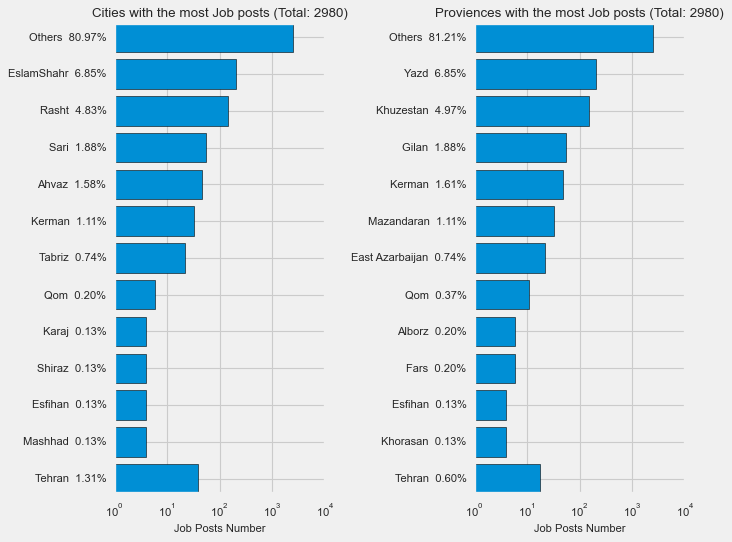

In [11]:
# convert amount* list into arrays for better efficency and allow array division by integers 
amount1 = np.array(amount1)
amount2 = np.array(amount2)
   
# generating percent arrays for each amount to display it in bar 'y' labels
percent1 = amount1/total_number_of_job_posts*100
percent2 = amount2/total_number_of_job_posts*100

labels1 = [f"{city}  {percent:.2f}%" for city, percent in zip(cities, percent1)]
labels2 = [f"{prov}  {percent:.2f}%" for prov, percent in zip(proviences, percent2)]

plt.style.use("fivethirtyeight")
# create two subplots objects
figure , (ax1, ax2) = plt.subplots(figsize=(9, 7), nrows=1, ncols=2)

# create the first horizontal bar chart
ax1.barh(cities, amount1, edgecolor="black", log=True)
ax1.set_title(f"Cities with the most Job posts (Total: {total_number_of_job_posts})", fontsize=12)

# to set label for y axis
ax1.set_yticks(range(len(cities)))
ax1.set_yticklabels(labels1)
ax1.set_xlabel("Job Posts Number", fontsize=10)

# create the second horizontal bar chart
ax2.barh(proviences, amount2, edgecolor="black", log=True)
ax2.set_title(f"Proviences with the most Job posts (Total: {total_number_of_job_posts})", fontsize=12)

# to set the label for y axis
ax2.set_yticks(range(len(proviences)))
ax2.set_yticklabels(labels2)
ax2.set_xlabel("Job Posts Number", fontsize=10)

figure.tight_layout()
plt.show()

### Visualize job pots with specific gender type using pie chart

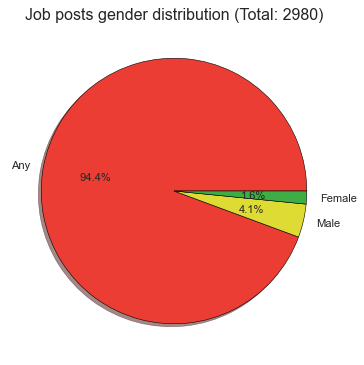

In [16]:
# to keep track for each record
total_records = 0
counter = collections.Counter()
for row in data["data"]:
    counter.update([row.get("Gender")])
    total_records += 1

plt.style.use("ggplot")
figure, ax = plt.subplots(figsize = (7, 5))

# create the pie obj using counter.values() array
ax.pie(counter.values(), labels=counter.keys(), colors=colors, wedgeprops={"edgecolor": "black"}, shadow=True, autopct="%1.1f%%")
ax.set_title(f"Job posts gender distribution (Total: {total_records})")

plt.show()